In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Text(0.5, 1.0, 'Label')

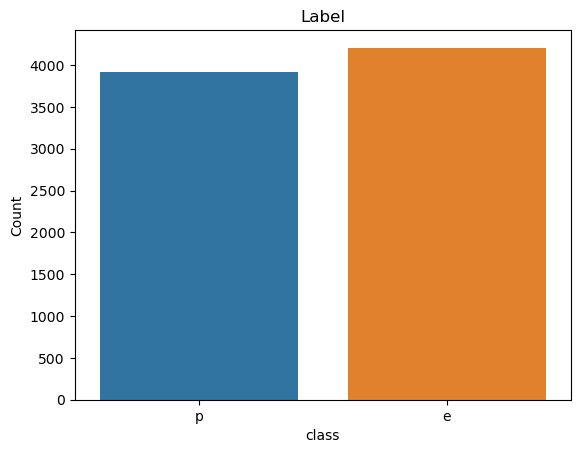

In [43]:
sns.countplot(data = df, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Label")

In [44]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [46]:
x = df.drop('class', axis=1)
y= df['class']

In [47]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [48]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [50]:
clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9906450024618415
[[1059    2]
 [  17  953]]


In [51]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9502708025603152
[[1018   43]
 [  58  912]]


In [52]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
1.0
[[1061    0]
 [   0  970]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
1.0
[[1061    0]
 [   0  970]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

In [56]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Regressior ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Logistic Regression Regressior ---
mse: 0.223000442689437
mae: 0.04972919743968488


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Radom Forest ---
mse: 0.0
mae: 0.0


In [58]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred = clf_dt.predict(X_test)

print ("\n--- Decision Tree Regressior ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- Decision Tree Regressior ---
mse: 0.0
mae: 0.0


In [59]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred = clf_svm.predict(X_test)

print("\n--- SVM Regressior ---")
mse = np.sqrt(mean_squared_error(pred, y_test))
print('mse:', mse)
mae = mean_absolute_error(y_test, pred)
print('mae:',mae)


--- SVM Regressior ---
mse: 0.09030344965537283
mae: 0.06077373797969326
